In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns",25)
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

In [2]:
# White Wine Data

wdf = pd.read_csv("winequality-white.csv",sep=";")
print("Shape :",wdf.shape)
wdf.head()

Shape : (4898, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Variable Identification

In [3]:
# Categorical Columns

def cat_cols(dataframe):
    return list(dataframe.select_dtypes(include='object').columns)

categorical_columns = cat_cols(wdf)

In [4]:
# Numerical columns

def num_cols(dataframe):
    return list(dataframe.select_dtypes(include='number').columns)

numerical_columns = num_cols(wdf)

In [5]:
# Numerical and Categorical Columns

print("Categorical Columns :\n",categorical_columns)
print("\nNumerical Columns :\n",numerical_columns)

Categorical Columns :
 []

Numerical Columns :
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [6]:
# Data info

wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
# Data Description

wdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


# Missing Values

In [8]:
# Missing Values

def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(wdf)

,Count,Percntage
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


# Univariate Analysis

In [9]:
# Column list

wdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
# Checking skewness of columns

for i in wdf.columns:
    print("\nSkewness of {0} : {1}\n".format(i,wdf[i].skew()))
    


Skewness of fixed acidity : 0.6477514746297539


Skewness of volatile acidity : 1.5769795029952025


Skewness of citric acid : 1.2819203981671066


Skewness of residual sugar : 1.0770937564240868


Skewness of chlorides : 5.023330682759707


Skewness of free sulfur dioxide : 1.4067449205303078


Skewness of total sulfur dioxide : 0.3907098416536745


Skewness of density : 0.9777730048689881


Skewness of pH : 0.4577825459180807


Skewness of sulphates : 0.9771936833065663


Skewness of alcohol : 0.4873419932161276


Skewness of quality : 0.15579639772222578



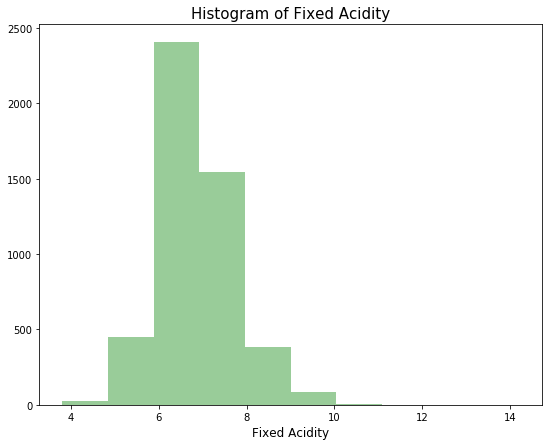

In [11]:
# Fixed Acidity 

plt.figure(figsize=[9,7])
sns.distplot(wdf['fixed acidity'],kde=False,bins=10,color='green')
plt.xlabel("Fixed Acidity",fontsize=12)
plt.title("Histogram of Fixed Acidity",fontsize=15);

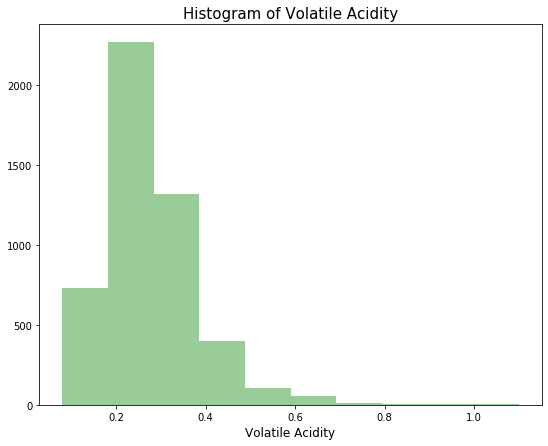

In [12]:
# Volatile Acidity 

plt.figure(figsize=[9,7])
sns.distplot(wdf['volatile acidity'],kde=False,bins=10,color='green')
plt.xlabel("Volatile Acidity",fontsize=12)
plt.title("Histogram of Volatile Acidity",fontsize=15);

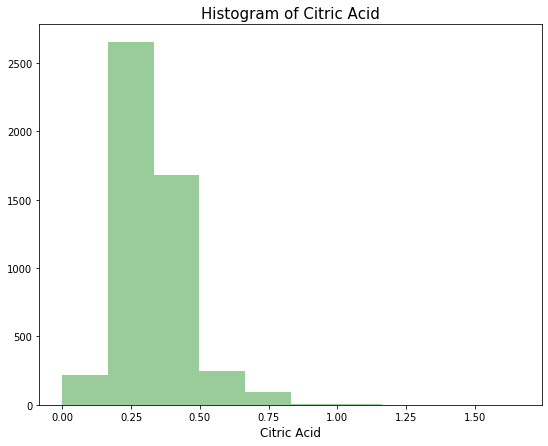

In [13]:
# Citric Acid

plt.figure(figsize=[9,7])
sns.distplot(wdf['citric acid'],kde=False,bins=10,color='green')
plt.xlabel("Citric Acid",fontsize=12)
plt.title("Histogram of Citric Acid",fontsize=15);

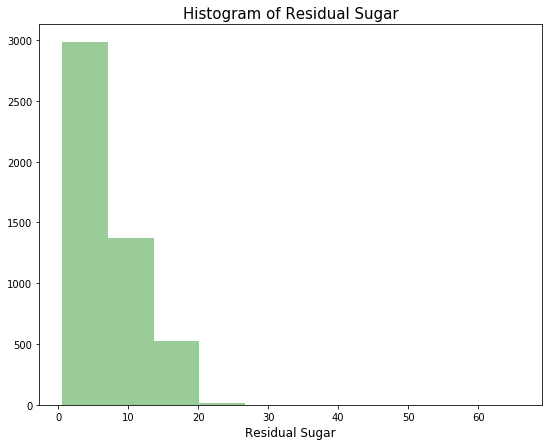

In [14]:
# Residual Sugar

plt.figure(figsize=[9,7])
sns.distplot(wdf['residual sugar'],kde=False,bins=10,color='green')
plt.xlabel("Residual Sugar",fontsize=12)
plt.title("Histogram of Residual Sugar",fontsize=15);

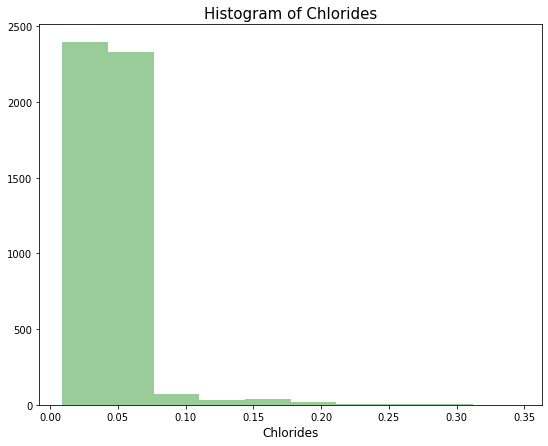

In [15]:
# Chlorides 

plt.figure(figsize=[9,7])
sns.distplot(wdf['chlorides'],kde=False,bins=10,color='green')
plt.xlabel("Chlorides",fontsize=12)
plt.title("Histogram of Chlorides",fontsize=15);

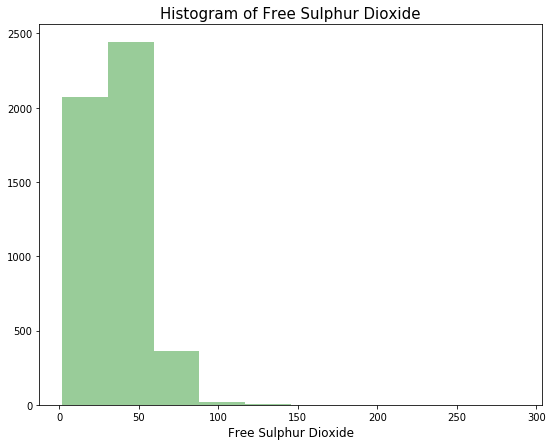

In [16]:
# Free Sulphur Dioxide

plt.figure(figsize=[9,7])
sns.distplot(wdf['free sulfur dioxide'],kde=False,bins=10,color='green')
plt.xlabel("Free Sulphur Dioxide",fontsize=12)
plt.title("Histogram of Free Sulphur Dioxide",fontsize=15);

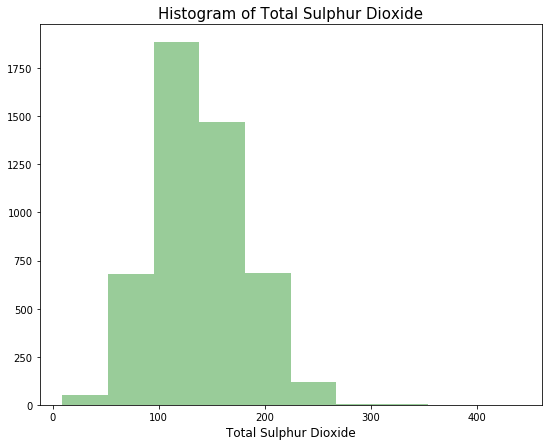

In [17]:
# Total Sulphur Dioxide

plt.figure(figsize=[9,7])
sns.distplot(wdf['total sulfur dioxide'],kde=False,bins=10,color='green')
plt.xlabel("Total Sulphur Dioxide",fontsize=12)
plt.title("Histogram of Total Sulphur Dioxide",fontsize=15);

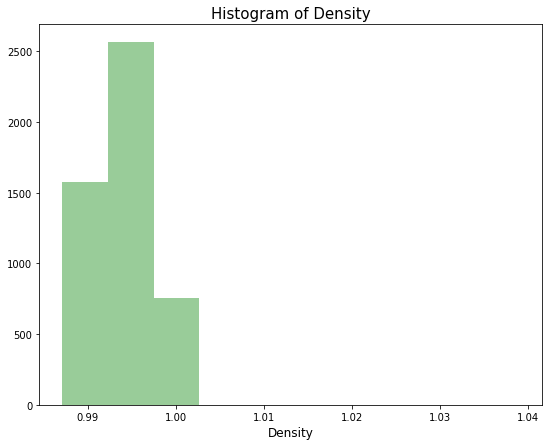

In [18]:
# Density

plt.figure(figsize=[9,7])
sns.distplot(wdf['density'],kde=False,bins=10,color='green')
plt.xlabel("Density",fontsize=12)
plt.title("Histogram of Density",fontsize=15);

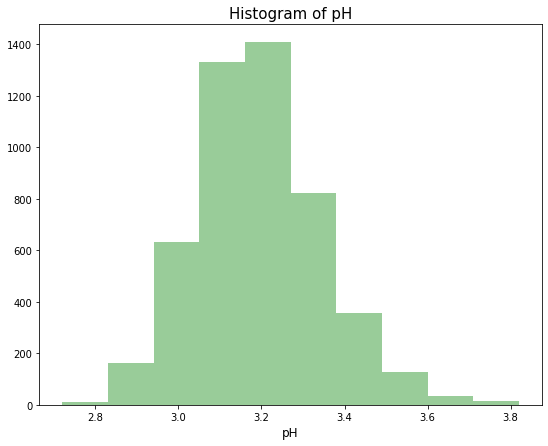

In [19]:
# pH

plt.figure(figsize=[9,7])
sns.distplot(wdf['pH'],kde=False,bins=10,color='green')
plt.xlabel("pH",fontsize=12)
plt.title("Histogram of pH",fontsize=15);

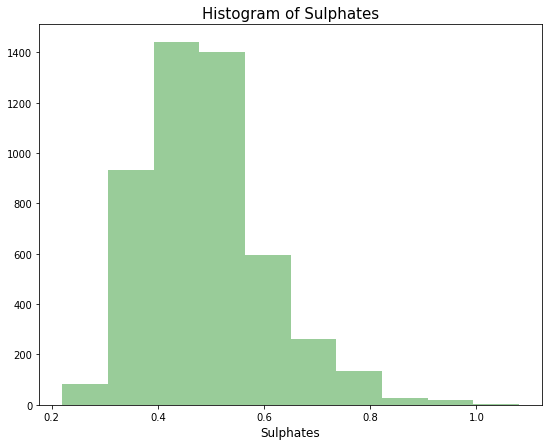

In [20]:
# Sulphates

plt.figure(figsize=[9,7])
sns.distplot(wdf['sulphates'],kde=False,bins=10,color='green')
plt.xlabel("Sulphates",fontsize=12)
plt.title("Histogram of Sulphates",fontsize=15);

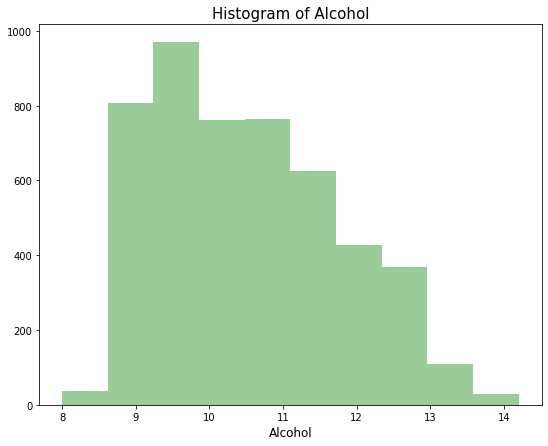

In [21]:
# Alcohol

plt.figure(figsize=[9,7])
sns.distplot(wdf['alcohol'],kde=False,bins=10,color='green')
plt.xlabel("Alcohol",fontsize=12)
plt.title("Histogram of Alcohol",fontsize=15);

# Bivariate Analysis

In [22]:
# Correlation 

wdf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [23]:
# Correlation w.r.t. target

wdf.corr()['quality']

fixed acidity          -0.113663
volatile acidity       -0.194723
citric acid            -0.009209
residual sugar         -0.097577
chlorides              -0.209934
free sulfur dioxide     0.008158
total sulfur dioxide   -0.174737
density                -0.307123
pH                      0.099427
sulphates               0.053678
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

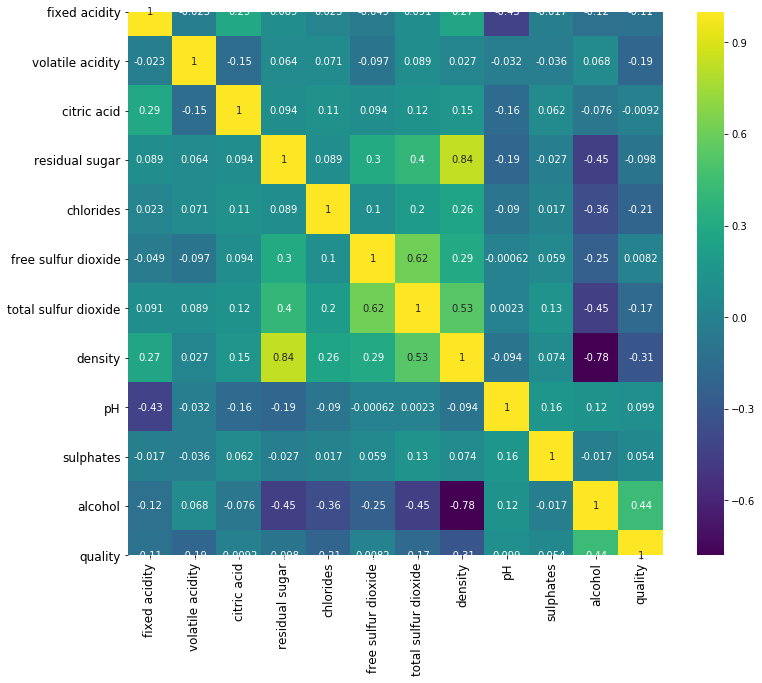

In [24]:
# Correlation Heatmap

plt.figure(figsize=[12,10])
sns.heatmap(wdf.corr(),annot=True,cmap='viridis')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Outlier Detection

In [25]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(wdf)


,Feature,Number of Outliers
0,fixed acidity,119
1,volatile acidity,186
2,citric acid,270
3,residual sugar,7
4,chlorides,212
5,free sulfur dioxide,50
6,total sulfur dioxide,19
7,density,5
8,pH,75
9,sulphates,124


# Variable Transformation

In [26]:
# Square root transformation to reduce skewness

wdf['chlorides'] = np.sqrt(wdf['chlorides'])

In [27]:
# Mapping different qualities of wine to 3 classes i.e Low(0), Medium(1) and High(2) 

bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2]
wdf['quality'] = pd.cut(wdf['quality'], bins=bins, labels=labels)

# Preprocessing and  Model Building

In [28]:
# Splitting the data into features and target

X = wdf.drop("quality",axis=1)
y = wdf.quality

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Feature Selection

In [29]:
# Feature Ranking

extra = ExtraTreeClassifier()
extra.fit(X,y)
ranked_features = pd.Series(extra.feature_importances_,index=X.columns).sort_values(ascending=False)
ranked_features

alcohol                 0.155732
volatile acidity        0.122744
density                 0.092910
citric acid             0.087293
pH                      0.082547
chlorides               0.081289
fixed acidity           0.080475
total sulfur dioxide    0.078268
free sulfur dioxide     0.076893
residual sugar          0.076278
sulphates               0.065571
dtype: float64

In [30]:
# Scaling the data

minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [31]:
# Logistic Regression

clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)
clf.score(X_test_scaled,y_test)

0.7244897959183674

In [32]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7704081632653061

In [33]:
# Naive Bayes Multinomial

mnclf = MultinomialNB()
mnclf.fit(X_train_scaled,y_train)
mnclf.score(X_test_scaled,y_test)

0.6285714285714286

In [34]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.8193877551020409

In [35]:
# Hyperparamter Tuning

n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [36]:
# random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0)

rf_optimized.fit(X_train,y_train)
rf_optimized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   3.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.2s remaining:    0.0s


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   3.4s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   3.4s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.9s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.9s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, mi

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=87, bootstrap=True, total=   5.4s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.4s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   3.3s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=50, min_sample

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   7.7s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   7.4s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   7.6s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   4.4s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788,

[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   3.1s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   3.2s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   5.2s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   4.8s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=89

[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   4.7s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.2s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.2s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   1.2s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=894, mi

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.3s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True, total=   2.1s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split

[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   2.7s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   2.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   7.8s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   7.5s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators

[CV]  n_estimators=683, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   4.1s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.8s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.6s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   2.6s
[CV] n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimato

[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   5.0s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   4.9s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   5.0s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True, total=   5.3s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 16.4min finished


{'n_estimators': 155,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 87,
 'bootstrap': False}

In [38]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=155, min_samples_split=5, min_samples_leaf=2,
                             max_features='sqrt', max_depth = 87, bootstrap = False,random_state=1)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("\nClassification Report : ",classification_report(y_test,y_pred))

Accuracy :  0.8173469387755102

Classification Report :                precision    recall  f1-score   support

           0       0.80      0.69      0.74       328
           1       0.82      0.91      0.86       616
           2       0.88      0.42      0.57        36

    accuracy                           0.82       980
   macro avg       0.84      0.67      0.72       980
weighted avg       0.82      0.82      0.81       980

